In [1]:
import simplejson as json
import requests # http lib
import pysftp # sftp lib
import base64 #... base64 lib
from pprint import pprint # garbage
from geolite2 import geolite2 # ip geolocation lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.tools as tls
import time
from tqdm import tqdm
# plotting-related imports:
import folium

/usr/local/lib/python3.6/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.22) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
#create sftp connection to honeypot to grab logging data
# with pysftp.Connection('13.58.190.48', username='ubuntu', private_key='blackbird_pub.pem') as sftp:
#     sftp.get('/home/ubuntu/honeypot/results/kako.json')
import os 
print(os.getcwd())

/home/Phil/Downloads/bb2/blackbird-master


In [3]:
#read raw data and saves to variable
raw_file = open('kako.json','r')
raw_captures = raw_file.readlines() # list of all json docs - as strings

In [4]:
all_captures = []
for cap in raw_captures:
    all_captures.append(json.loads(cap)) # converts str to json

In [5]:
locations = []
reader = geolite2.reader()
i=0
for cap in all_captures:
    src_ip = cap['source_ip']
    match = reader.get(src_ip)
    if match is not None:
        if match['location']['latitude'] is not None and match['location']['longitude'] is not None:
            #pprint(match)
            #print("\n\n\n\n\n\n\n")
            if 'city' in match and 'location' in match and 'country' in match:
               locations.append({
                                'lat': match['location']['latitude'], 
                                'lon': match['location']['longitude'],
                                'city': match['city']['names']['en'],
                                'country': match['country']['names']['en'],
                                'sim': cap['simulation_name'],
                                'dest_port': int(cap['destination_port']),
                                'iso_code': match['country']['iso_code']
                                } )
            


In [6]:
import time
for a in locations:
    print("city: " + a['city'])
    print("country: " + a['country'])
    print("sim: " + a['sim'])
    print("dest_port:",a['dest_port'])
#print('hi')
#for i,a in enumerate(locations):
#    print(a['dest_port'])

#print('hi2')

city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: St. Catharines
country: Canada
sim: TPLink HTTP Simulation
dest_port: 80
city: St. Catharines
country: Canada
sim: TPLink HTTP Simulation
dest_port: 80
city: St. Catharines
country: Canada
sim: TPLink HTTP Simulation
dest_port: 80
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim:

city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Qingdao
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Qingdao
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Qingdao
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Yekaterinburg
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Qingdao
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Qingdao
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Qingdao
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Chongqing
country: Chi

city: Campo Grande
country: Brazil
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hengyang
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hengyang
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Campo Grande
country: Brazil
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hengyang
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hengyang
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Campo Grande
country: Brazil
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hengyang
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hengyang
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Campo Grande
country: Brazil
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hengyang
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hengyang
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Ca

dest_port: 23
city: Zhengzhou
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Zhengzhou
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Zhengzhou
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Zhengzhou
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Zhengzhou
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Zhengzhou
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Zhengzhou
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Zhengzhou
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Zhengzhou
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Zhengzhou
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Zhengzhou
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Zhengzhou
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
ci

dest_port: 23
city: Duncanville
country: United States
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Duncanville
country: United States
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Duncanville
country: United States
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Duncanville
country: United States
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Duncanville
country: United States
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Duncanville
country: United States
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Duncanville
country: United States
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Passa Quatro
country: Brazil
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Harrow
country: United Kingdom
sim: TPLink HTTP Simulation
dest_port: 80
city: Hangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Moscow
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Toronto
country: Ca

dest_port: 23
city: Kobe
country: Japan
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Kobe
country: Japan
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Kobe
country: Japan
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Kobe
country: Japan
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Kobe
country: Japan
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Kobe
country: Japan
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Kobe
country: Japan
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Kobe
country: Japan
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Surgut
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Kobe
country: Japan
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Surgut
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Kobe
country: Japan
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Surgut
country: Russia
sim: Linux Generic Telnet S

dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Boardman
country: United States
sim: TPLink HTTP Simulation
dest_port: 80
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Kherson
country: Ukraine
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai

sim: TPLink HTTP Simulation
dest_port: 80
city: Thousand Oaks
country: United States
sim: TPLink HTTP Simulation
dest_port: 80
city: Thousand Oaks
country: United States
sim: TPLink HTTP Simulation
dest_port: 80
city: Thousand Oaks
country: United States
sim: TPLink HTTP Simulation
dest_port: 80
city: Thousand Oaks
country: United States
sim: TPLink HTTP Simulation
dest_port: 80
city: Thousand Oaks
country: United States
sim: TPLink HTTP Simulation
dest_port: 80
city: Thousand Oaks
country: United States
sim: TPLink HTTP Simulation
dest_port: 80
city: Zhengzhou
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Noyabrsk
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Zhengzhou
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Noyabrsk
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Zhengzhou
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Noyabrsk
country: Russia
sim: Li

sim: Linux Generic Telnet Simulation
dest_port: 23
city: Qingdao
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Qingdao
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Qingdao
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Qingdao
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Panorama
country: Brazil
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Panorama
country: Brazil
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Panorama
country: Brazil
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Panorama
country: Brazil
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Panorama
country: Brazil
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Panorama
country: Brazil
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Panorama
country: Brazil
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Panorama
country: Brazil
sim: Linux Generic Telne

country: Chile
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Santiago
country: Chile
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Santiago
country: Chile
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Santiago
country: Chile
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Santiago
country: Chile
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Santiago
country: Chile
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tehran
country: Iran
sim: Linux Generic Telnet Simulation
dest_port: 23
city: North York
country: Canada
sim: TPLink HTTP Simulation
dest_port: 80
city: North York
country: Canada
sim: TPLink HTTP Simulation
dest_port: 80
city: North York
country: Canada
sim: TPLink HTTP Simulation
dest_port: 80
city: North York
country: Canada
sim: TPLink HTTP Simulation
dest_port: 80
city: North York
country: Canada
sim: TPLink HTTP Simulation
dest_port: 80
city: Trzemeszno Lubuskie
country: Poland
sim: TPLink HTTP Simulation
dest_p

country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: T

city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: 

city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Ho

dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: 

Here begin mapping shenanigans

In [7]:
m=None
m = folium.Map(no_wrap=True)

tooltip = "Click for more info"
#print(len(all_captures))
#print(len(locations))
i=0
for loc in locations:
    folium.Marker([loc['lat'],loc['lon']],tooltip=tooltip, 
                  popup='{city}, {country}: {sim}, port {port}'.format(city=loc['city'],
                                                                    country=loc['country'],
                                                                    sim=loc['sim'],
                                                                   port=loc['dest_port'])).add_to(m)
    i+=1
    if (i==500):
        break

In [8]:
m

In [9]:
 for cap in all_captures[0:1]:
    print(base64.b64decode(cap['capture']).strip().decode('ascii')) # decode from base64, strip trailing newline, decode into ascii
    print('#################################')

\xff\xfevstarcam2015
20150602
enable 
linuxshell
system 
shell 
sh 
/bin/busybox SEFA 
#################################


In [10]:
import requests
from pprint import pprint 
api_url = "https://exploits.shodan.io/api/search"
query_payload = {'key': 'ZZ0bFuYl0odZPu2XFWxq34wfIRipdeUW', 'query': 'crypt32'}

print(query_payload)
r = requests.get(api_url,params=query_payload)
pprint(r.text)

{'key': 'ZZ0bFuYl0odZPu2XFWxq34wfIRipdeUW', 'query': 'crypt32'}
('{"matches": [{"source": "CVE", "_id": "2003-0818", "description": "Multiple '
 'integer overflows in Microsoft ASN.1 library (MSASN1.DLL), as used in '
 'LSASS.EXE, CRYPT32.DLL, and other Microsoft executables and libraries on '
 'Windows NT 4.0, 2000, and XP, allow remote attackers to execute arbitrary '
 'code via ASN.1 BER encodings with (1) very large length fields that cause '
 'arbitrary heap data to be overwritten, or (2) modified bit strings.", '
 '"osvdb": [], "bid": [], "cve": ["CVE-2003-0818"], "msb": ["MS04-007"]}, '
 '{"code": "##\\r\\n# $Id: iconics_webhmi_setactivexguid.rb 12584 2011-05-11 '
 '20:45:54Z sinn3r $\\r\\n##\\r\\n\\r\\n##\\r\\n# This file is part of the '
 'Metasploit Framework and may be subject to\\r\\n# redistribution and '
 'commercial restrictions. Please see the Metasploit\\r\\n# Framework web site '
 'for more information on licensing and terms of use.\\r\\n# '
 'http://metasploit.com/fr

 'C:\\\\Windows\\\\SYSTEM32\\\\ninput.dll\\r\\nModLoad: 00007ffd`46900000 '
 '00007ffd`46ea4000   C:\\\\Windows\\\\SYSTEM32\\\\d2d1.dll\\r\\nModLoad: '
 '00007ffd`40390000 00007ffd`4064f000   '
 'C:\\\\Windows\\\\SYSTEM32\\\\DWrite.dll\\r\\nModLoad: 00007ffd`30470000 '
 '00007ffd`304ca000   '
 'C:\\\\Windows\\\\System32\\\\Windows.Graphics.dll\\r\\nModLoad: '
 '00007ffd`2d6f0000 00007ffd`2d6ff000   '
 'C:\\\\Windows\\\\System32\\\\Windows.Internal.SecurityMitigationsBroker.dll\\r\\nModLoad: '
 '00007ffd`448a0000 00007ffd`448e2000   '
 'C:\\\\Windows\\\\SYSTEM32\\\\vm3dum64.dll\\r\\nModLoad: 00007ffd`44680000 '
 '00007ffd`446e7000   '
 'C:\\\\Windows\\\\SYSTEM32\\\\D3D10Level9.dll\\r\\nModLoad: 00007ffd`37780000 '
 '00007ffd`377eb000   C:\\\\Windows\\\\System32\\\\oleacc.dll\\r\\nModLoad: '
 '00007ffd`2d6e0000 00007ffd`2d6f0000   '
 'C:\\\\Windows\\\\system32\\\\msimtf.dll\\r\\nModLoad: 00007ffd`40030000 '
 '00007ffd`400b8000   '
 'C:\\\\Windows\\\\system32\\\\directmanipulation.dll\\r\

 '00000000`00000000 00000000`00000000 00000000`00000000 : '
 'ntdll!RtlUserThreadStart+0x21\\r\\n0:016> db r8 '
 'l-100\\r\\n0000023d`22d80f00  61 61 61 61 61 61 61 61-61 61 61 61 61 61 61 '
 '61  aaaaaaaaaaaaaaaa\\r\\n0000023d`22d80f10  61 61 61 61 61 61 61 61-61 61 '
 '61 61 61 61 61 61  aaaaaaaaaaaaaaaa\\r\\n0000023d`22d80f20  61 61 61 61 61 '
 '61 61 61-61 61 61 61 61 61 61 61  aaaaaaaaaaaaaaaa\\r\\n0000023d`22d80f30  '
 '61 61 61 61 61 61 61 61-61 61 61 61 61 61 61 61  '
 'aaaaaaaaaaaaaaaa\\r\\n0000023d`22d80f40  61 61 61 61 61 61 61 61-61 61 61 61 '
 '61 61 61 61  aaaaaaaaaaaaaaaa\\r\\n0000023d`22d80f50  61 61 61 61 61 61 61 '
 '61-61 61 61 61 61 61 61 61  aaaaaaaaaaaaaaaa\\r\\n0000023d`22d80f60  61 61 '
 '61 61 61 61 61 61-61 61 61 61 61 61 61 61  '
 'aaaaaaaaaaaaaaaa\\r\\n0000023d`22d80f70  61 61 61 61 61 61 61 61-61 61 61 61 '
 '61 61 61 61  aaaaaaaaaaaaaaaa\\r\\n0000023d`22d80f80  61 61 61 61 61 61 61 '
 '61-61 61 61 61 61 61 61 61  aaaaaaaaaaaaaaaa\\r\\n0000023d`22d80f90  61

 '00010000`42424242 00010000`42424242 00010000`42424242 : '
 '0x10000`42424242\\r\\n00010000`42424242 : 00010000`42424242 '
 '00010000`42424242 00010000`42424242 00010000`42424242 : '
 '0x10000`42424242\\r\\n00010000`42424242 : 00010000`42424242 '
 '00010000`42424242 00010000`42424242 00010000`42424242 : '
 '0x10000`42424242\\r\\n00010000`42424242 : 00010000`42424242 '
 '00010000`42424242 00010000`42424242 00010000`42424242 : '
 '0x10000`42424242\\r\\n00010000`42424242 : 00010000`42424242 '
 '00010000`42424242 00010000`42424242 00010000`42424242 : '
 '0x10000`42424242\\r\\n00010000`42424242 : 00010000`42424242 '
 '00010000`42424242 00010000`42424242 00010000`42424242 : '
 '0x10000`42424242\\r\\n00010000`42424242 : 00010000`42424242 '
 '00010000`42424242 00010000`42424242 00010000`42424242 : '
 '0x10000`42424242\\r\\n00010000`42424242 : 00010000`42424242 '
 '00010000`42424242 00010000`42424242 00010000`42424242 : '
 '0x10000`42424242\\r\\n00010000`42424242 : 00010000`42424242 '
 '000100

In [11]:
df=pd.DataFrame(locations)
df2=pd.DataFrame(all_captures)['source_ip']
df[['iso_code','city']].groupby('iso_code').count().sort_values(by='city',ascending=False).to_csv('results.csv',sep=",")


            src_ip    0
0    43.229.38.171  321
1    192.186.23.25  259
2   121.201.45.173  259
3   132.232.193.63  253
4  193.112.182.252  208
5    193.112.1.116  192
6    120.27.233.64  164
7   103.71.236.215  129
8  104.214.221.238  107
9    2.249.160.194   91


<BarContainer object of 10 artists>

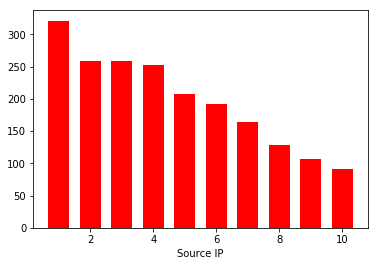

In [12]:
df2=pd.read_csv('ip.csv')
df3=df2.rename(index=str, columns={"183.192.241.114": "src_ip"}).groupby('src_ip').count().sort_values(by='0',ascending=False)
df3.to_csv('pls.csv',sep=",")
df3=pd.read_csv('pls.csv')
print(df3.head(10))
x=range(1,11)
y = df3['0'].head(10)
width = 1/1.5
N = len(y)
plt.xlabel('Source IP',rotation=0)
plt.bar(x,y,width,color="red")

<BarContainer object of 10 artists>

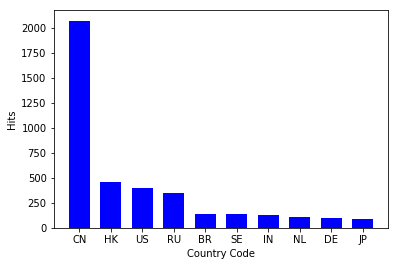

In [13]:
df2 = pd.read_csv('results.csv')
y = df2['city'].head(10)
x = df2['iso_code'].head(10)
width = 1/1.5
N = len(y)
plt.ylabel('Hits',rotation=90)
plt.xlabel('Country Code',rotation=0)
plt.bar(x,y,width,color="blue")


In [14]:
history = []
dangerousMaster = []
count = 0
for cap in all_captures:
    #print(cap['capture'])
    try:
        temp = base64.b64decode(cap['capture']).strip().decode('ascii')
        for temp_line in temp.split('\r\n'):
            for element in temp_line.split(' '):
                if element not in dangerousMaster:
                    if element not in history:
                        history.append(element)
                        count+=1
    except:
        print("caught")
toDoCount = count
print(toDoCount)

caught
caught
1175


In [19]:
api_url = "https://exploits.shodan.io/api/search"
 #query_payload = {'key': 'ZZ0bFuYl0odZPu2XFWxq34wfIRipdeUW', 'query': 'MIRAI'}
query_payload = {'key': 'ZZ0bFuYl0odZPu2XFWxq34wfIRipdeUW', 'query': ''}
import time
import pprint
import base64
history = []
innocuous = []
dangerous = {}
dangerousMaster = {}
warningList = []
count = 0 

In [20]:
for cap in tqdm(all_captures):
    try:
        temp = base64.b64decode(cap['capture']).strip().decode('ascii')
        for temp_line in temp.split('\r\n'):
            for element in temp_line.split(' '):
                if element not in dangerousMaster:
                    if element not in history:
                        try: 
                            history.append(element)
                            query_payload['query'] = element
                            #print("Trying: " + element)
                            r = requests.get(api_url,params=query_payload)
                            time.sleep(1)
                            if not (r.status_code == 503):
                                r2 = json.loads(r.text)
                                
                                if( 'matches' not in r2 or r2["matches"] == [] ):
                              #      print("No response: " + element)
                                    innocuous.append(element)
                                else:
                                    dangerous[element]  = []
                                    for i in r2["matches"]:
                                        if("cve" in i and i["cve"] != []):
                                           # print("Found CVE's")
                                            dangerous[element].append(i["cve"])
                                    dangerousMaster[element] = dangerous[element]
                                    
                               #     print("Response: " + element)

                            #else:
                                #print("Skipping: " + element)

                        except AttributeError:
                            continue
                    #        print("Skipping: " + element)
                else:
                    dangerous[element] = dangerousMaster[element]

        if dangerous != {}:
            #print("New Packet being written")
            path = "CVEball.txt"
            jsonball = {"capture": cap,"shodan_hits": dangerous}

            with open(path, 'ab+') as f:
                f.seek(0,2)                                #Go to the end of file    
                if f.tell() == 0 :                         #Check if file is empty
                    f.write(json.dumps([jsonball]).encode())  #If empty, write an array
                else :
                    f.seek(-1,2)           
                    f.truncate()                           #Remove the last character, open the array
                    f.write(' , '.encode())                #Write the separator
                    f.write(json.dumps(jsonball).encode())    #Dump the dictionary
                    f.write(']'.encode())                  #Close the array
            dangerous = {}
            
    except:
        print("Exception")

  7%|▋         | 296/4510 [06:39<1:34:47,  1.35s/it]

Exception


 26%|██▌       | 1158/4510 [13:02<37:44,  1.48it/s] 

Exception


100%|██████████| 4510/4510 [28:38<00:00,  2.62it/s]


In [18]:
count = 0
for cap in all_captures:
    #print(cap['capture'])
    try:
        temp = base64.b64decode(cap['capture']).strip().decode('ascii')
        for temp_line in temp.split('\r\n'):
            for element in temp_line.split(' '):
                history.append(element)
                count+=1
    except UnicodeDecodeError:
        continue
        #print("caught")
print("Unoptimized queries/ length in seconds: ",count)
print("in hours: ","{:.2f}".format(count/60/60))

temphistory = []
tempdangerousMaster = []
count = 0
for cap in all_captures:
    #print(cap['capture'])
    try:
        temp = base64.b64decode(cap['capture']).strip().decode('ascii')
        for temp_line in temp.split('\r\n'):
            for element in temp_line.split(' '):
                if element not in tempdangerousMaster:
                    if element not in temphistory:
                        temphistory.append(element)
                        count+=1
    except UnicodeDecodeError:
        continue
        #print("caught")
print("Optimized queries/ length in seconds: ",count)
print("in minutes: ", "{:.2f}".format(count/60))
print("Out of our", len(all_captures), "captured packets", len(all_CVE_ball_captures), "are potentially threatening")


Unoptimized queries/ length in seconds:  72396
in hours:  20.11
Optimized queries/ length in seconds:  1175
in minutes:  19.58


NameError: name 'all_CVE_ball_captures' is not defined

In [ ]:
print("Turned 3M of packet data into 46M of packet data and CVE names - an increase of 1533%")
print("Future work: optimize data processing/ data storage.  Kako stores everything in text files.  Integrate a database for   data storage")
print("Future work: determine if",len(all_CVE_ball_captures),"/",len(all_captures),"packets are truly potentially threatening - this is a honeypot afterall... this      might be appropriate")

In [ ]:
print(json.dumps(all_CVE_ball_captures[0]['shodan_hits']))


In [32]:
#CVEball.txt
import json
import base64
import time
raw_CVE_ball = open('/home/Phil/Downloads/bb2/blackbird-master/CVEball.txt','r')
raw_CVE_ball_captures = raw_CVE_ball.readlines() # list of all json docs - as strings
all_CVE_ball_captures = []
for cap in raw_CVE_ball_captures:
    all_CVE_ball_captures.append(json.loads(cap)) # converts str to json

all_CVE_ball_captures = all_CVE_ball_captures[0] #since is an array with len 1
print(len(all_CVE_ball_captures))
all_CVE_ball_captures[0] = all_CVE_ball_captures[-1]
all_CVE_ball_captures[1] = all_CVE_ball_captures[-2]

17966


In [33]:
HTMLBall = []
HTMLBall.append("<!DOCTYPE html>\n")
HTMLBall.append("<HTML>\n")
HTMLBall.append("<HEAD>\n")
HTMLBall.append("<TITLE>Kako + Blackbird</TITLE>\n")
HTMLBall.append("""<style>table {max-width: 1500;}

/* The Modal (background) */
.modal {
  display: none; /* Hidden by default */
  position: fixed; /* Stay in place */
  z-index: 1; /* Sit on top */
  padding-top: 100px; /* Location of the box */
  left: 0;
  top: 0;
  width: 100%; /* Full width */
  height: 100%; /* Full height */
  overflow: auto; /* Enable scroll if needed */
  background-color: rgb(0,0,0); /* Fallback color */
  background-color: rgba(0,0,0,0.4); /* Black w/ opacity */
}

/* Modal Content */
.modal-content {
  background-color: #fefefe;
  margin: auto;
  padding: 20px;
  border: 1px solid #888;
  width: 80%;
}

/* The Close Button */
.close {
  color: #aaaaaa;
  float: right;
  font-size: 28px;
  font-weight: bold;
}

.close:hover,
.close:focus {
  color: #000;
  text-decoration: none;
  cursor: pointer;
}
</style>\n""")

HTMLBall.append("</HEAD>\n")
HTMLBall.append("<body>")
practiceCount = 500

for count in range(0, min(practiceCount,len(all_CVE_ball_captures))):
    HTMLBall.append("""
<div id =\"myModal"""+str(count)+"\" class=\"modal\">"+"""
    <div class=\"modal-content\">
        <span class=\"close\">&times;</span>
        <p>"""+ json.dumps(all_CVE_ball_captures[count]['shodan_hits']) +"""</p>
    </div>
</div>
""")
    
    
HTMLBall.append("<table width=\"1500\">")
HTMLBall.append("<tr><th>Packet #</th><th>Packet Capture</th><th>Source IP</th><th>Destination Port/ Simulated service</th><th>Time Stamp</th><th>CVE's</th></tr>")

for count,packet in enumerate(all_CVE_ball_captures):
    HTMLBall.append(" ".join(["<tr><td>",str(count),"</td><td>",#"\\n ".join(base64.b64decode(packet['capture']['capture']).strip().decode('ascii').split("\r\n"))
                    base64.b64decode(packet['capture']['capture']).strip().decode('ascii'),
                   "</td><td>",packet['capture']['source_ip'],"</td><td>",str(packet['capture']['destination_port']),':', packet['capture']['simulation_name'], packet['capture']['simulation_version'],'</td><td>',time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(packet['capture']['timestamp'])),
                    "</td><td><button id=\"myBtn"+str(count)+"\">CVE's</button></td></tr>"]))
    if count == min(practiceCount,len(all_CVE_ball_captures)):
        break
HTMLBall.append('</table>\n')
HTMLBall.append("<script>\n")
for count in range(0,min(practiceCount,len(all_CVE_ball_captures))):
    HTMLBall.append("var modal" + str(count) + " = document.getElementById(\"myModal"+str(count)+"\");\n")
    HTMLBall.append("var btn"+str(count)+" = document.getElementById(\"myBtn"+str(count)+"\");\n")

HTMLBall.append("var span = document.getElementsByClassName(\"close\")[0];\n")
for count in range(0,min(practiceCount,len(all_CVE_ball_captures))-1):
    HTMLBall.append("btn"+str(count)+""".onclick = function() {
  modal"""+str(count)+""".style.display = "block";
}
""")

HTMLBall.append("""
span.onclick = function() {
  modal0.style.display = "none";
}
""")

HTMLBall.append("window.onclick = function(event) {\n")
tempStr = "     if ("
for count in range(0,min(practiceCount,len(all_CVE_ball_captures))-1):
    tempStr+=" event.target == modal"+str(count)+ " ||"

tempStr+=" event.target == modal"+str(practiceCount-1)+""")
     {
         event.target.style.display = \"none\";
     }
}
"""

HTMLBall.append(tempStr)



HTMLBall.append("</script></body>")
HTMLBall.append('</HTML>')

In [34]:
# print(HTMLBall[:500])
f = open('HTMLBALL2.html','w')
for i in HTMLBall:
    #print(i)
    f.write(i)
f.close()

In [ ]:
CVE_counter=0
CVE_ball = []

for hit in all_CVE_ball_captures[0]['shodan_hits']:
    for CVE_list in all_CVE_ball_captures[0]['shodan_hits'][hit]:
        for CVE in CVE_list:
            if CVE not in CVE_ball:
                CVE_ball.append(CVE)
                CVE_counter+=1

print("First packets contents start")
print(base64.b64decode(all_CVE_ball_captures[0]['capture']['capture']).strip().decode('ascii'))
print("First packets contents end")
print()
print("# of unique CVE's attached to the first packet:",len(CVE_ball))
print("First packet post-processing:")
print(all_CVE_ball_captures[0]) #sample processed packet

In [ ]:
keywords = []
for capture in all_CVE_ball_captures:
     for hit in capture['shodan_hits']:
            if hit == '/phpMyAdmin/phpMyAdmin/index.php':
                print(capture)
                break
        
        #for CVE_list in capture['shodan_hits'][hit]:
            
                

In [ ]:
query_payload = {'key': 'ZZ0bFuYl0odZPu2XFWxq34wfIRipdeUW', 'query': '/phpMyAdmin/phpMyAdmin/index.php'}

r = requests.get(api_url,params=query_payload)
print(r.text)

In [ ]:
#for key in all_CVE_ball_captures[0]['shodan_hits']:
print(json.dumps(all_CVE_ball_captures[0]['shodan_hits']))
        

In [ ]:
all_CVE_ball_captures[0]['capture']['source_ip']

In [ ]:
from scapy.all import *
import base64

In [ ]:
pkt = rdpcap("/home/Phil/ftp_attacks.pcap")

In [ ]:
pkt.summary()

In [ ]:
streamedIPBall = {}
finAckAndAckCounter = {}
for p in pkt:
    if p[IP].dport != 21:
        combString = str(" " .join([p[IP].dst,str(p[IP].dport),p[IP].src,str(p[IP].sport)]))
    else:
        combString = str(" " .join([p[IP].src,str(p[IP].sport),p[IP].dst,str(p[IP].dport)]))
    
    if combString not in streamedIPBall:
        streamedIPBall[combString] = {}
        finAckAndAckCounter[combString] = 0
        streamedIPBall[combString]['capture'] = ""
        streamedIPBall[combString]['timestamp'] = round(p[TCP].time)
        streamedIPBall[combString]['simulation_name'] = "vsFTPd"
        streamedIPBall[combString]['simulation_version'] = "3.0.3"
        streamedIPBall[combString]['vulnerability'] = "UNKNOWN"
        if p[IP].dport != 21:
            streamedIPBall[combString]['source_ip'] = p[IP].dst
            streamedIPBall[combString]['destination_ip'] = p[IP].src
            streamedIPBall[combString]['destination_port'] = p[IP].sport
            streamedIPBall[combString]['node'] = "ip-"+"-".join(str(p[IP].src).split("."))
        else:
            streamedIPBall[combString]['source_ip'] = p[IP].src
            streamedIPBall[combString]['destination_ip'] = p[IP].dst
            streamedIPBall[combString]['destination_port'] = p[IP].dport
            streamedIPBall[combString]['node'] = "ip-"+"-".join(str(p[IP].dst).split("."))
        streamedIPBall[combString] = [streamedIPBall[combString]]
        
    elif streamedIPBall[combString][-1] == {}:
        streamedIPBall[combString][-1]['capture'] = ""
        streamedIPBall[combString][-1]['timestamp'] = round(p[TCP].time)
        streamedIPBall[combString][-1]['simulation_name'] = "vsFTPd"
        streamedIPBall[combString][-1]['simulation_version'] = "3.0.3"
        streamedIPBall[combString][-1]['vulnerability'] = "UNKNOWN"
        if p[IP].dport != 21:
            streamedIPBall[combString][-1]['source_ip'] = p[IP].dst
            streamedIPBall[combString][-1]['destination_ip'] = p[IP].src
            streamedIPBall[combString][-1]['destination_port'] = p[IP].sport
            streamedIPBall[combString][-1]['node'] = "ip-"+"-".join(str(p[IP].src).split("."))
        else:
            streamedIPBall[combString][-1]['source_ip'] = p[IP].src
            streamedIPBall[combString][-1]['destination_ip'] = p[IP].dst
            streamedIPBall[combString][-1]['destination_port'] = p[IP].dport
            streamedIPBall[combString][-1]['node'] = "ip-"+"-".join(str(p[IP].dst).split("."))
        
    if p[TCP].flags == "FA" and p[IP].dport == 21:
        finAckAndAckCounter[combString] = 1
    
    if finAckAndAckCounter[combString] == 1 and p[IP].sport == 21 and p[TCP].flags == "A":
        finAckAndAckCounter[combString] = 0
        streamedIPBall[combString].append({})
    
    if Raw in p:
        streamedIPBall[combString][-1]['capture']+= str(p[Raw]).split("'")[1][:-4]+" \n "
        if p[IP].dport != 21:
            streamedIPBall[combString][-1]['source_ip'] = p[IP].dst
            streamedIPBall[combString][-1]['destination_ip'] = p[IP].src
            streamedIPBall[combString][-1]['destination_port'] = p[IP].sport
        else:
            streamedIPBall[combString][-1]['source_ip'] = p[IP].src
            streamedIPBall[combString][-1]['destination_ip'] = p[IP].dst
            streamedIPBall[combString][-1]['destination_port'] = p[IP].dport

#capture -> payload
#destination_ip -> "TODO"
#destination_port -> 21
#node -> "ip-199-246-40-57"
#simulation_name -> "vsFTPd"
#simulation_version -> "3.0.3"
#source_ip -> "172.26.6.139"
#timestamp -> "1566594512"

#capture -> str(p[Raw]).split("'")[1][:-4]
#source_ip -> p[IP].src
#destination_ip -> p[IP].dst
#timestamp -> p[TCP].time
#desination_port -> p[IP].dport
#simulation_name -> deduce off of dport
#simulation_version -> deduce off of dport
#node -> "ip-<p[IP].src>"
#vulnerability -> "UNKNOWN"

for key in streamedIPBall:
    print(key)
    print(streamedIPBall[key])
    print()
#     for entry in range(len(streamedIPBall[key])):
#         print(entry)
#         streamedIPBall[key][entry]['capture'] = base64.b64encode(streamedIPBall[key][entry]['capture'].encode())


In [ ]:
#The appendium
import json
f= open("/home/Phil/Downloads/bb2/blackbird-master/kako.json", "a+")
for key in streamedIPBall:
    for entry in streamedIPBall[key]:
        if entry != {}:
            #entry['capture'] = str(base64.b64encode(entry['capture'].encode()))
            entry=(str(entry).replace("'",'"')).replace('""','"')
            f.write(entry+"\n")
f.close()
print("Hello world, it's Saraj")



In [26]:
for cap in all_captures:
    try:
        temp = base64.b64decode(cap['capture']).strip().decode('ascii')
        if ("fk" in temp):
            print(temp)
            break
    except:
        print("Phil u make angry phil")

Phil u make angry phil
Phil u make angry phil
220 (vsFTPd 3.0.3) 
 USER fk u 
 331 Please specify the password. 
 PASS fatboi 
 530 Login incorrect. 
 QUIT 
 221 Goodbye.
